In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
campaign = pd.read_csv("D:/Python NPN Training/Logistic Regression/campaigning.csv")

In [3]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
campaign.shape

(41188, 21)

In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
campaign.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
campaign.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

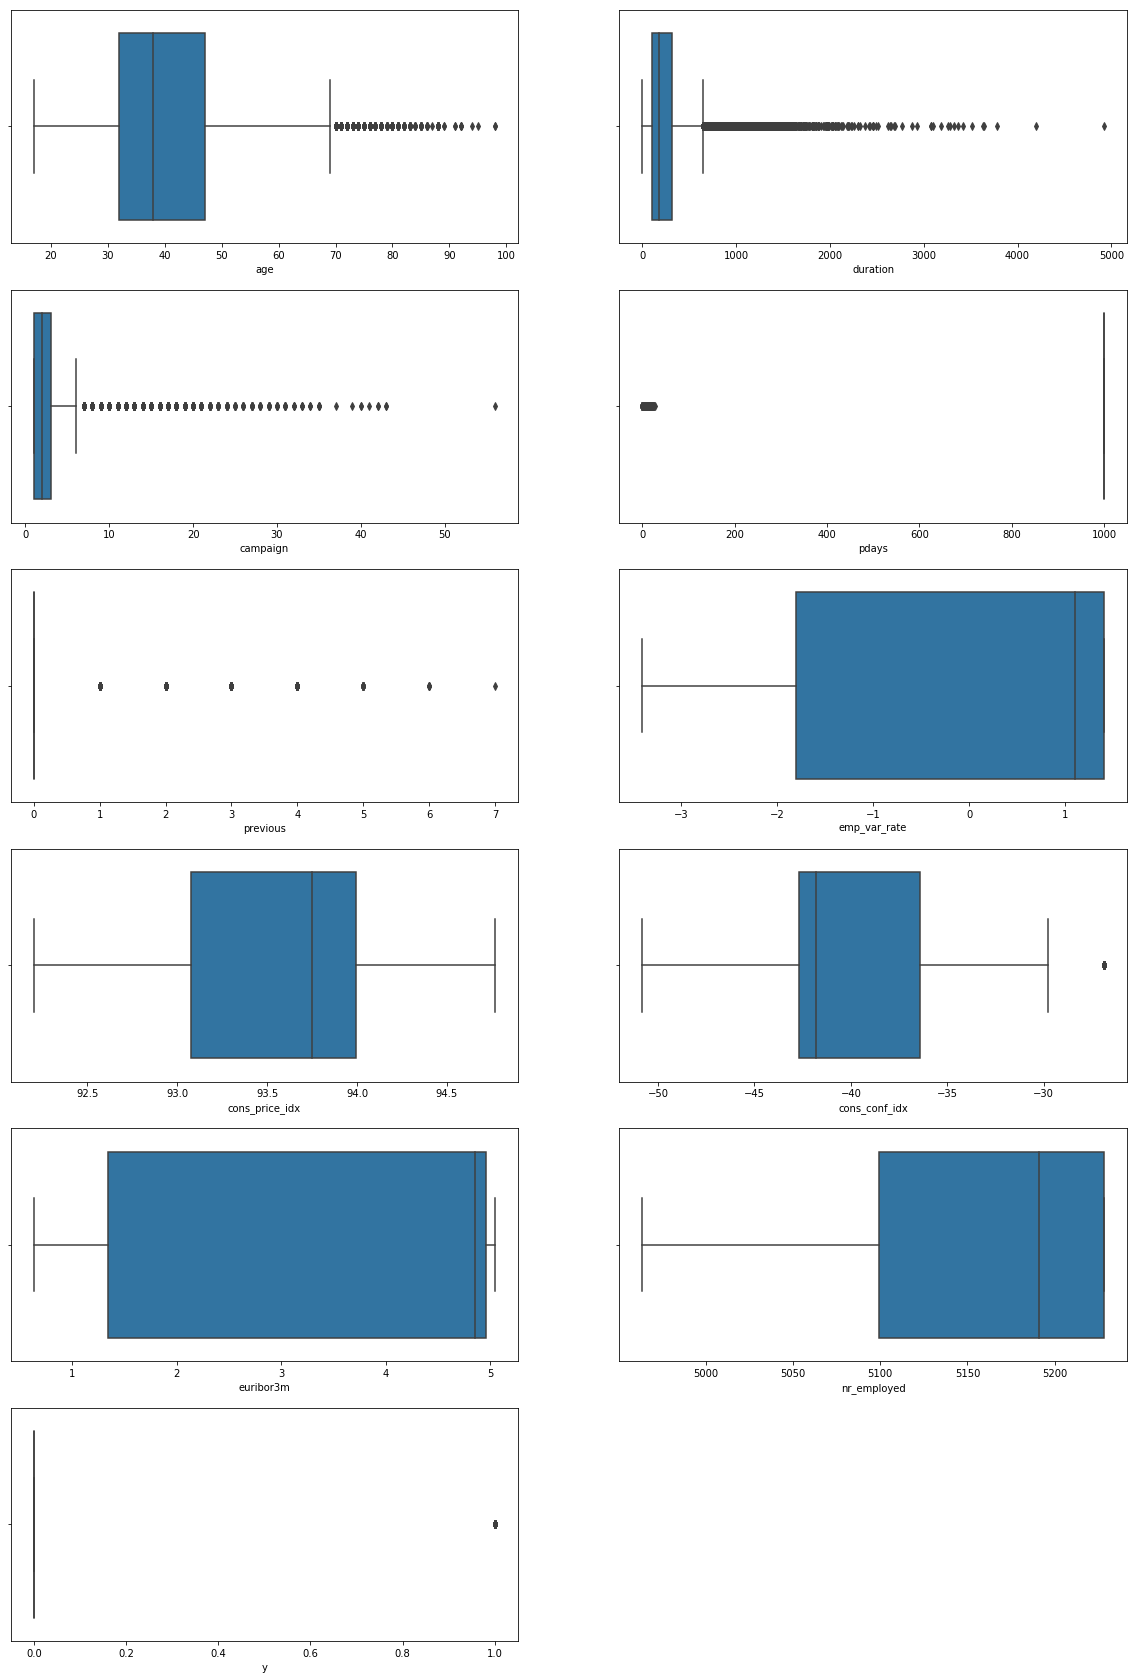

In [15]:
fig = plt.figure(figsize=(20,30))
j=1
for i in campaign.columns.tolist():
    if campaign[i].dtype != 'O':
        fig.add_subplot(6,2,j)
        sns.boxplot(campaign[i])
        plt.xlabel(i)
        j=j+1

In [18]:
def outlier(df):
    outlier={}
    for i in df.columns.tolist():
        if df[i].dtype!='O':
            Q1,Q3=np.percentile(df[i],[25,75])
            IQR=Q3-Q1
            upper_bound = Q3+(1.5*IQR)
            lower_bound = Q1-(1.5*IQR)
            outlier[i]=[upper_bound,lower_bound]  
        
    return outlier

In [19]:
outlier(campaign)

{'age': [69.5, 9.5],
 'duration': [644.5, -223.5],
 'campaign': [6.0, -2.0],
 'pdays': [999.0, 999.0],
 'previous': [0.0, 0.0],
 'emp_var_rate': [6.200000000000001, -6.6000000000000005],
 'cons_price_idx': [95.3725, 91.69650000000001],
 'cons_conf_idx': [-26.949999999999992, -52.150000000000006],
 'euribor3m': [10.3865, -4.081499999999999],
 'nr_employed': [5421.6, 4905.6],
 'y': [0.0, 0.0]}

In [21]:
campaign[campaign['age']>70].shape

(422, 21)

In [22]:
campaign[campaign['duration']>650].shape

(2915, 21)

In [25]:
campaign[campaign['campaign']>10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
38,44,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,...,25,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
39,54,management,married,university.degree,no,yes,yes,cellular,aug,thu,...,11,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
59,26,blue-collar,married,high.school,no,yes,no,telephone,jun,wed,...,12,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
75,45,services,married,professional.course,no,no,no,telephone,aug,thu,...,18,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
133,30,technician,single,university.degree,no,yes,no,cellular,aug,thu,...,17,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40833,42,admin.,married,university.degree,no,no,yes,cellular,jul,thu,...,25,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
40956,47,self-employed,married,university.degree,no,yes,no,cellular,aug,tue,...,13,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
40975,31,technician,single,professional.course,unknown,no,no,telephone,aug,thu,...,14,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
41007,36,housemaid,married,high.school,no,yes,no,telephone,jun,fri,...,11,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0


In [28]:
campaign[campaign['pdays']==999].shape

(39673, 21)

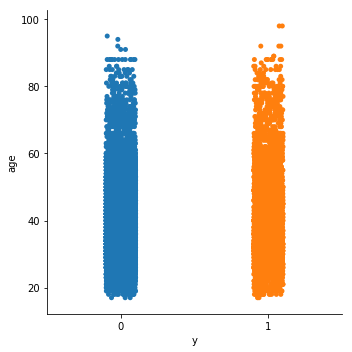

In [30]:
sns.catplot(x='y',y='age',data=campaign)

In [44]:
campaign['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [46]:
campaign['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [31]:
import scipy.stats as stat

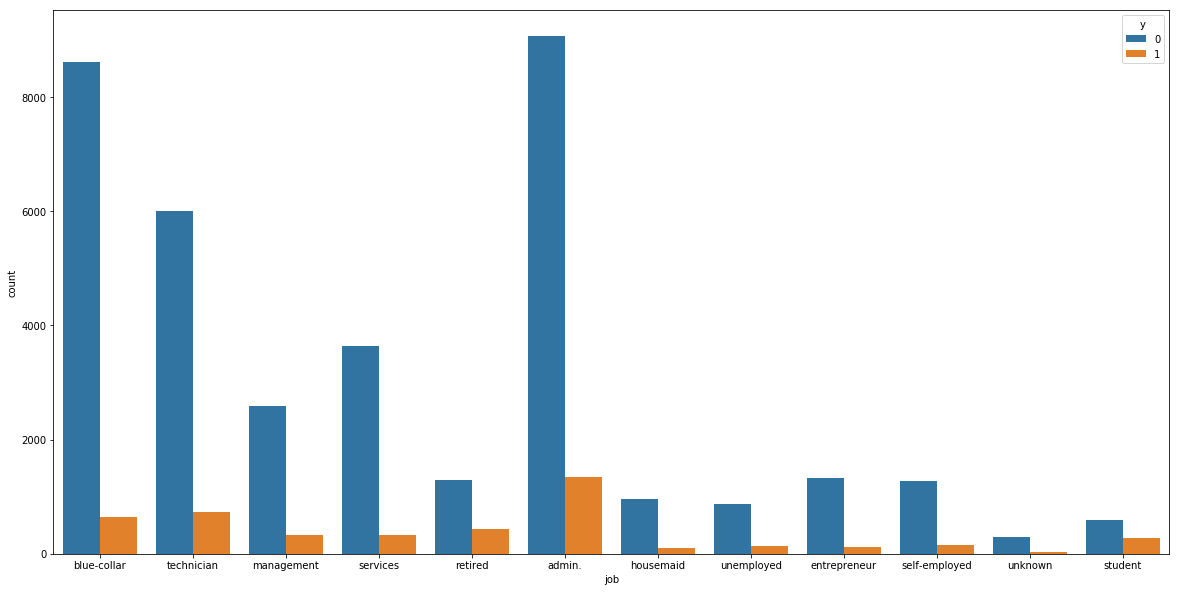

In [40]:
fig = plt.figure(figsize=(20,10))
sns.countplot(campaign['job'],hue=campaign['y'])

In [48]:
job_data = pd.crosstab(campaign['job'],campaign['y'])

In [42]:
chi2,p,dof,expected = stat.chi2_contingency(job_data)

In [43]:
print(p)

4.189763287563623e-199


In [49]:
education_data = pd.crosstab(campaign['education'],campaign['y'])

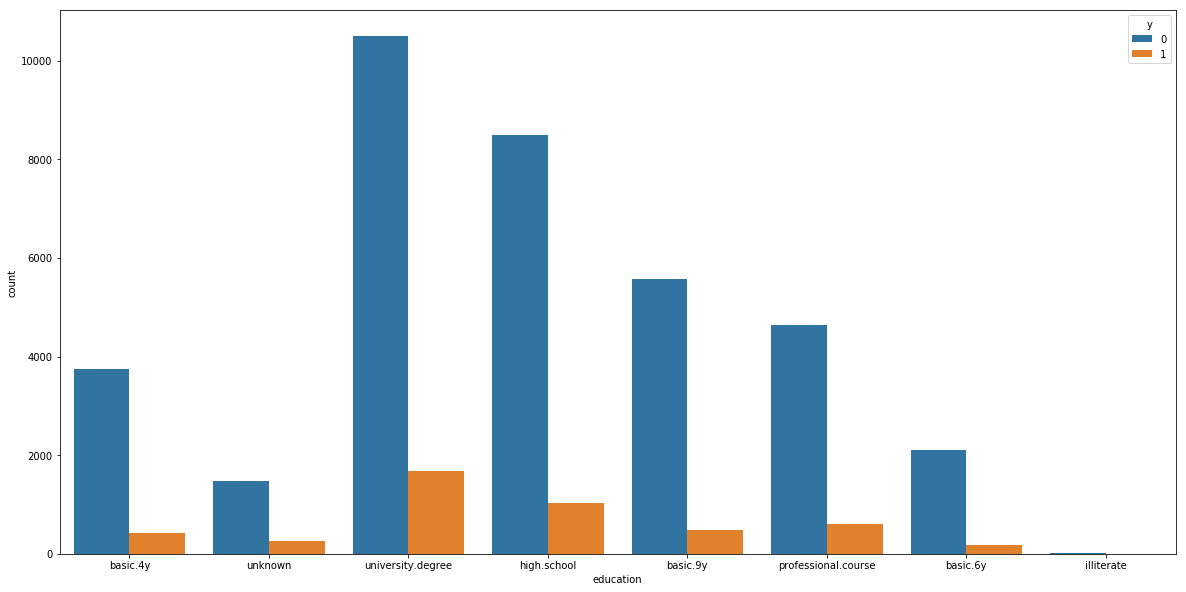

In [50]:
fig = plt.figure(figsize=(20,10))
sns.countplot(campaign['education'],hue=campaign['y'])

In [51]:
chi2,p,dof,expected = stat.chi2_contingency(education_data)

In [52]:
print(p)

3.3051890144025054e-38


In [41]:
help(stat.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

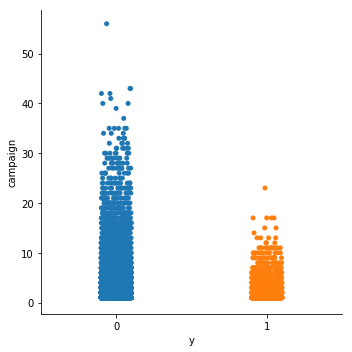

In [54]:
sns.catplot(x='y',y='campaign',data=campaign)